#DATA 410 Lecture 22 - Spring 2022


<font face="Chalkboard" color="darkgreen" size=10>Real Data Applications</font>

<font face="Chalkboard" color="darkred" size=8>Generalized Additive Models</font>

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 120

In [2]:
!pip install pygam

     ---------------------------------------- 1.8/1.8 MB 3.3 MB/s eta 0:00:00


In [3]:
# general imports
import numpy as np
import pandas as pd
from pygam import LinearGAM
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [8]:
df = pd.read_csv('Data/Boston_Housing_Prices.csv')
features = ['crime','rooms','residential','industrial','nox','older','distance','highway','tax','ptratio','lstat']
X = np.array(df[features])
y = np.array(df['cmedv']).reshape(-1,1)
Xdf = df[features]

display(Xdf)
print(Xdf.shape)

,crime,rooms,residential,industrial,nox,older,distance,highway,tax,ptratio,lstat
0,0.00632,6.575,18.0,2.31,0.538,65.199997,4.0900,1,296,15.300000,4.98
1,0.02731,6.421,0.0,7.07,0.469,78.900002,4.9671,2,242,17.799999,9.14
2,0.02729,7.185,0.0,7.07,0.469,61.099998,4.9671,2,242,17.799999,4.03
3,0.03237,6.998,0.0,2.18,0.458,45.799999,6.0622,3,222,18.700001,2.94
4,0.06905,7.147,0.0,2.18,0.458,54.200001,6.0622,3,222,18.700001,5.33
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,6.593,0.0,11.93,0.573,69.099998,2.4786,1,273,21.000000,9.67
502,0.04527,6.120,0.0,11.93,0.573,76.699997,2.2875,1,273,21.000000,9.08
503,0.06076,6.976,0.0,11.93,0.573,91.000000,2.1675,1,273,21.000000,5.64
504,0.10959,6.794,0.0,11.93,0.573,89.300003,2.3889,1,273,21.000000,6.48


(506, 11)


In [9]:
X_train, X_test, y_train, y_test = tts(X,y,test_size=0.1,random_state=1234)
scale = StandardScaler()

In [10]:
Xs_train = scale.fit_transform(X_train)
Xs_test =scale.transform(X_test)

In [26]:
# here we fit the GAM with 4 splines per feature
gam = LinearGAM(n_splines=4, verbose=False).gridsearch(X_train, y_train,objective='GCV')
gam.summary()

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:01
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:01
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:01
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00
 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00
 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00
 63% (7 of 11) |###############          | Elapsed Time: 0:00:01 ETA:   0:00:00
 72% (8 of 11) |##################       | Elapsed Time: 0:00:01 ETA:   0:00:00
 81% (9 of 11) |####################     | Elapsed Time: 0:00:01 ETA:   0:00:00
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:01 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     26.3405
Link Function:                     IdentityLink Log Likelihood:                                 -1667.8793
Number of Samples:                          455 AIC:                                             3390.4396
                                                AICc:                                            3394.0718
                                                GCV:                                               16.8604
                                                Scale:                                             15.1131
                                                Pseudo R-Squared:                                   0.8348
Feature Function                  Lam

C:\Users\mnelk\AppData\Local\Temp/ipykernel_7748/3925828742.py:3: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [14]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

In [15]:
yhat = gam.predict(X_test)
1000*MAE(y_test,yhat)

2522.076886058736

In [ ]:
def do_kfold(X,y,k,rs,n_splines):
  PE_internal_validation = []
  PE_external_validation = []
  kf = KFold(n_splits=k,shuffle=True,random_state=rs)
  for idxtrain, idxtest in kf.split(X):
    X_train = X[idxtrain,:]
    y_train = y[idxtrain]
    X_test = X[idxtest,:]
    y_test = y[idxtest]
    gam = LinearGAM(n_splines=n_splines, verbose=0).gridsearch(X_train, y_train,objective='GCV')
    yhat_test = gam.predict(X_test)
    yhat_train = gam.predict(X_train)
    PE_internal_validation.append(MAE(y_train,yhat_train))
    PE_external_validation.append(MAE(y_test,yhat_test))
  return 1000*np.mean(PE_internal_validation), 1000*np.mean(PE_external_validation)


In [30]:
do_kfold(X,y,10,1234,18)

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:04
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:03
 27% (3 of 11) |######                   | Elapsed Time: 0:00:01 ETA:   0:00:03
 36% (4 of 11) |#########                | Elapsed Time: 0:00:01 ETA:   0:00:02
 45% (5 of 11) |###########              | Elapsed Time: 0:00:02 ETA:   0:00:02
 54% (6 of 11) |#############            | Elapsed Time: 0:00:02 ETA:   0:00:02
 63% (7 of 11) |###############          | Elapsed Time: 0:00:02 ETA:   0:00:01
 72% (8 of 11) |##################       | Elapsed Time: 0:00:03 ETA:   0:00:01
 81% (9 of 11) |####################     | Elapsed Time: 0:00:03 ETA:   0:00:00
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:04 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:04 Time:  0:00:04
  0% (0 of 11) |                        

(1941.0173624798706, 2517.0724239008923)

In [34]:
knots = np.arange(4,22,1)
vals = []
for n in knots:
    val = do_kfold(X,y,10,123,n)[1]
    vals.append(val)

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:01
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:01
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00
 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00
 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00
 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00
 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00
 81% (9 of 11) |####################     | Elapsed Time: 0:00:01 ETA:   0:00:00
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:01 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01
  0% (0 of 11) |                        

KeyboardInterrupt: 

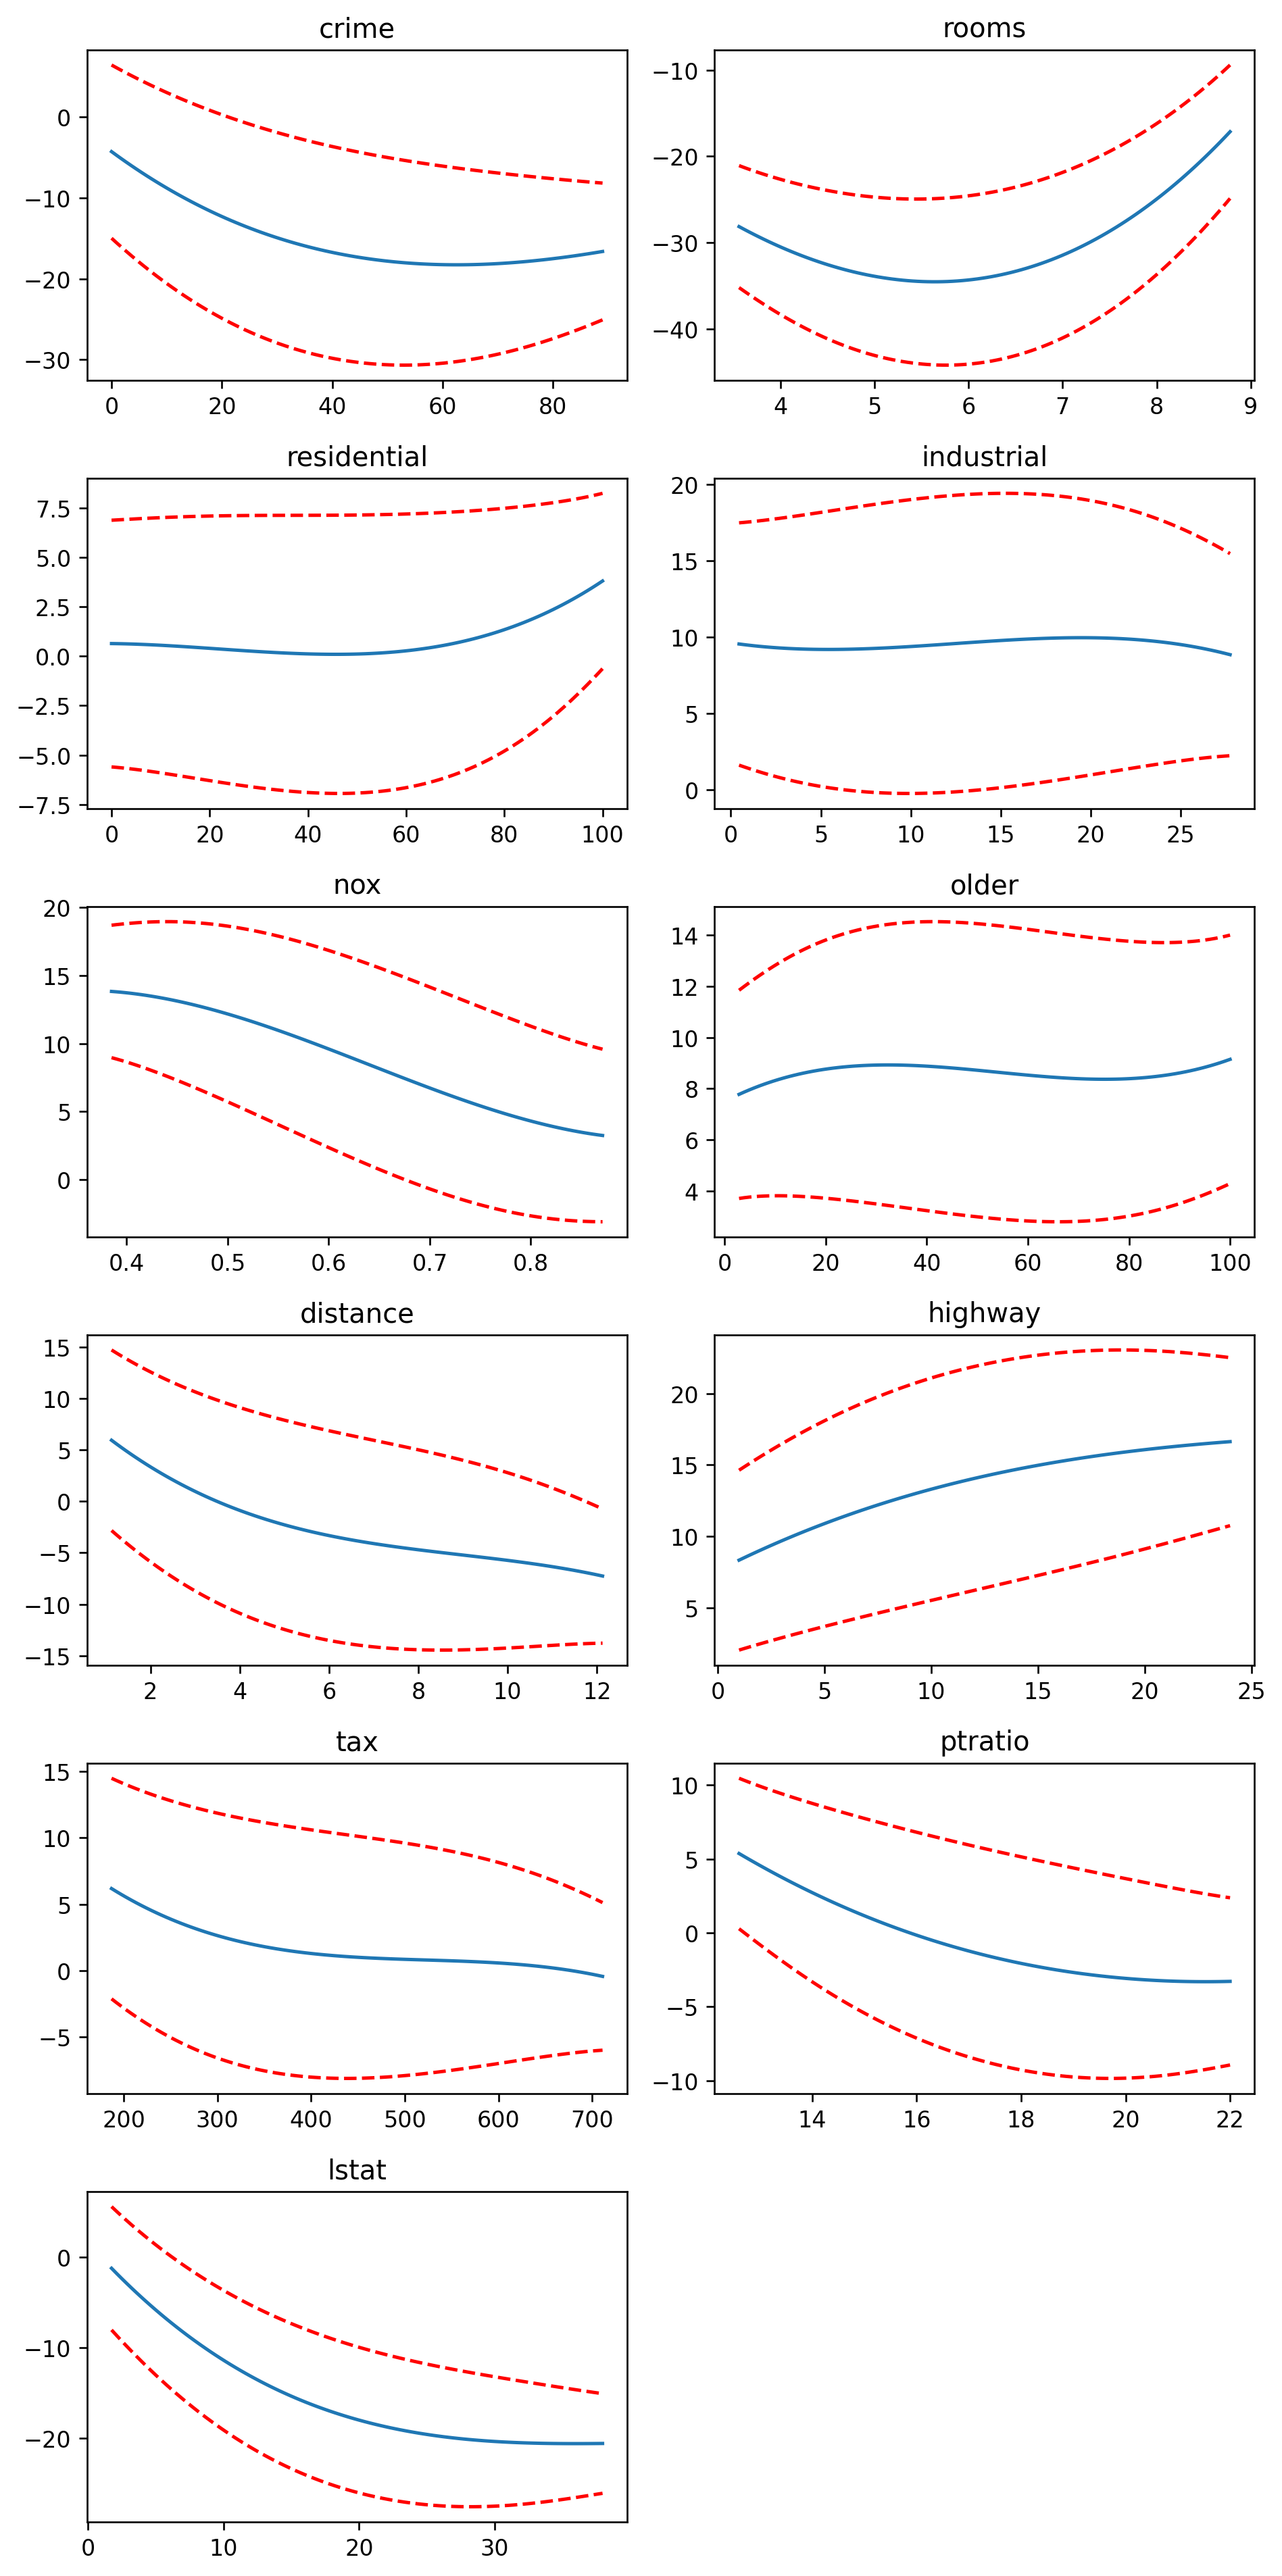

In [18]:
plt.rcParams['figure.figsize'] = (28, 8)
fig = plt.figure()
titles = df[features].columns

fig.set_figheight(16)
fig.set_figwidth(8)

for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)
    ax = fig.add_subplot(6, 2, i+1)
    ax.plot(XX[:, term.feature], pdep)
    ax.plot(XX[:, term.feature], confi, c='r', ls='--')
    ax.set_title(titles[i])
    fig.tight_layout()
plt.show()

<font face="Chalkboard" color="darkred" size=8>Kernel Weighted Regression (Nadaraya-Watson)</font>


<font color='red'>**Main Idea**: Estimate a conditional mean (expected value).</font>


If we have estimates for the joint probability density $f$ and the marginal density $f_X$ we consider:

$$\large{
m(x)=\mathbb{E}[y| X=x]=\int y f_{Y| X=x}(y)\,\mathrm{d}y=\frac{\int yf(x,y)\,\mathrm{d}y}{f_X(x)}\tag{1}
}
$$

where $X$ is the input data (features) and $Y$ is the dependent variable.

We approximate the joint probability density function by using a kernel:

$$\large{
\begin{align}
\hat{f}(x,y;\mathbf{h})=\frac{1}{n}\sum_{i=1}^n K_{h_1}(x-X_{i})K_{h_2}(y-Y_{i}).
\end{align}}
$$

The marginal density is also approximated in a similar way:

$$\large{
\hat{f}_X(x;h_1)=\frac{1}{n}\sum_{i=1}^nK_{h_1}(x-X_{i})}.
$$

By substituting these approximations into equation (1) we obtain:

$${
\begin{align*}
\frac{\int y \hat{f}(x,y;\mathbf{h})\,\mathrm{d}y}{\hat{f}_X(x;h_1)}=&\,\frac{\int y \frac{1}{n}\sum_{i=1}^nK_{h_1}(x-X_i)K_{h_2}(y-Y_i)\,\mathrm{d}y}{\frac{1}{n}\sum_{i=1}^nK_{h_1}(x-X_i)}\\
=&\,\frac{\frac{1}{n}\sum_{i=1}^nK_{h_1}(x-X_i)\int y K_{h_2}(y-Y_i)\,\mathrm{d}y}{\frac{1}{n}\sum_{i=1}^nK_{h_1}(x-X_i)}\\
=&\,\frac{\frac{1}{n}\sum_{i=1}^nK_{h_1}(x-X_i)Y_i}{\frac{1}{n}\sum_{i=1}^nK_{h_1}(x-X_i)}\\
=&\,\sum_{i=1}^n\frac{K_{h_1}(x-X_i)}{\sum_{i=1}^nK_{h_1}(x-X_i)}Y_i.
\end{align*}}
$$

Thus the conditional mean $\mathbb{E}[Y| X=x]$ can be seen as a weighted average of $Y_i$:

$$\large{
\mathbb{E}[Y| X=x]=\sum\limits_{i=1}^nW_{i}(x)Y_i}
$$

where

$$\large{
\begin{align*}
W_{i}(x):=\frac{K_h(x-X_i)}{\sum_{i=1}^nK_h(x-X_i)}.
\end{align*}}
$$

<font color='green'>
This is to say that the Nadaraya-Watson estimator is a local mean of $Y_i$ around $x.$
</font>

In [ ]:
!pip install kernreg

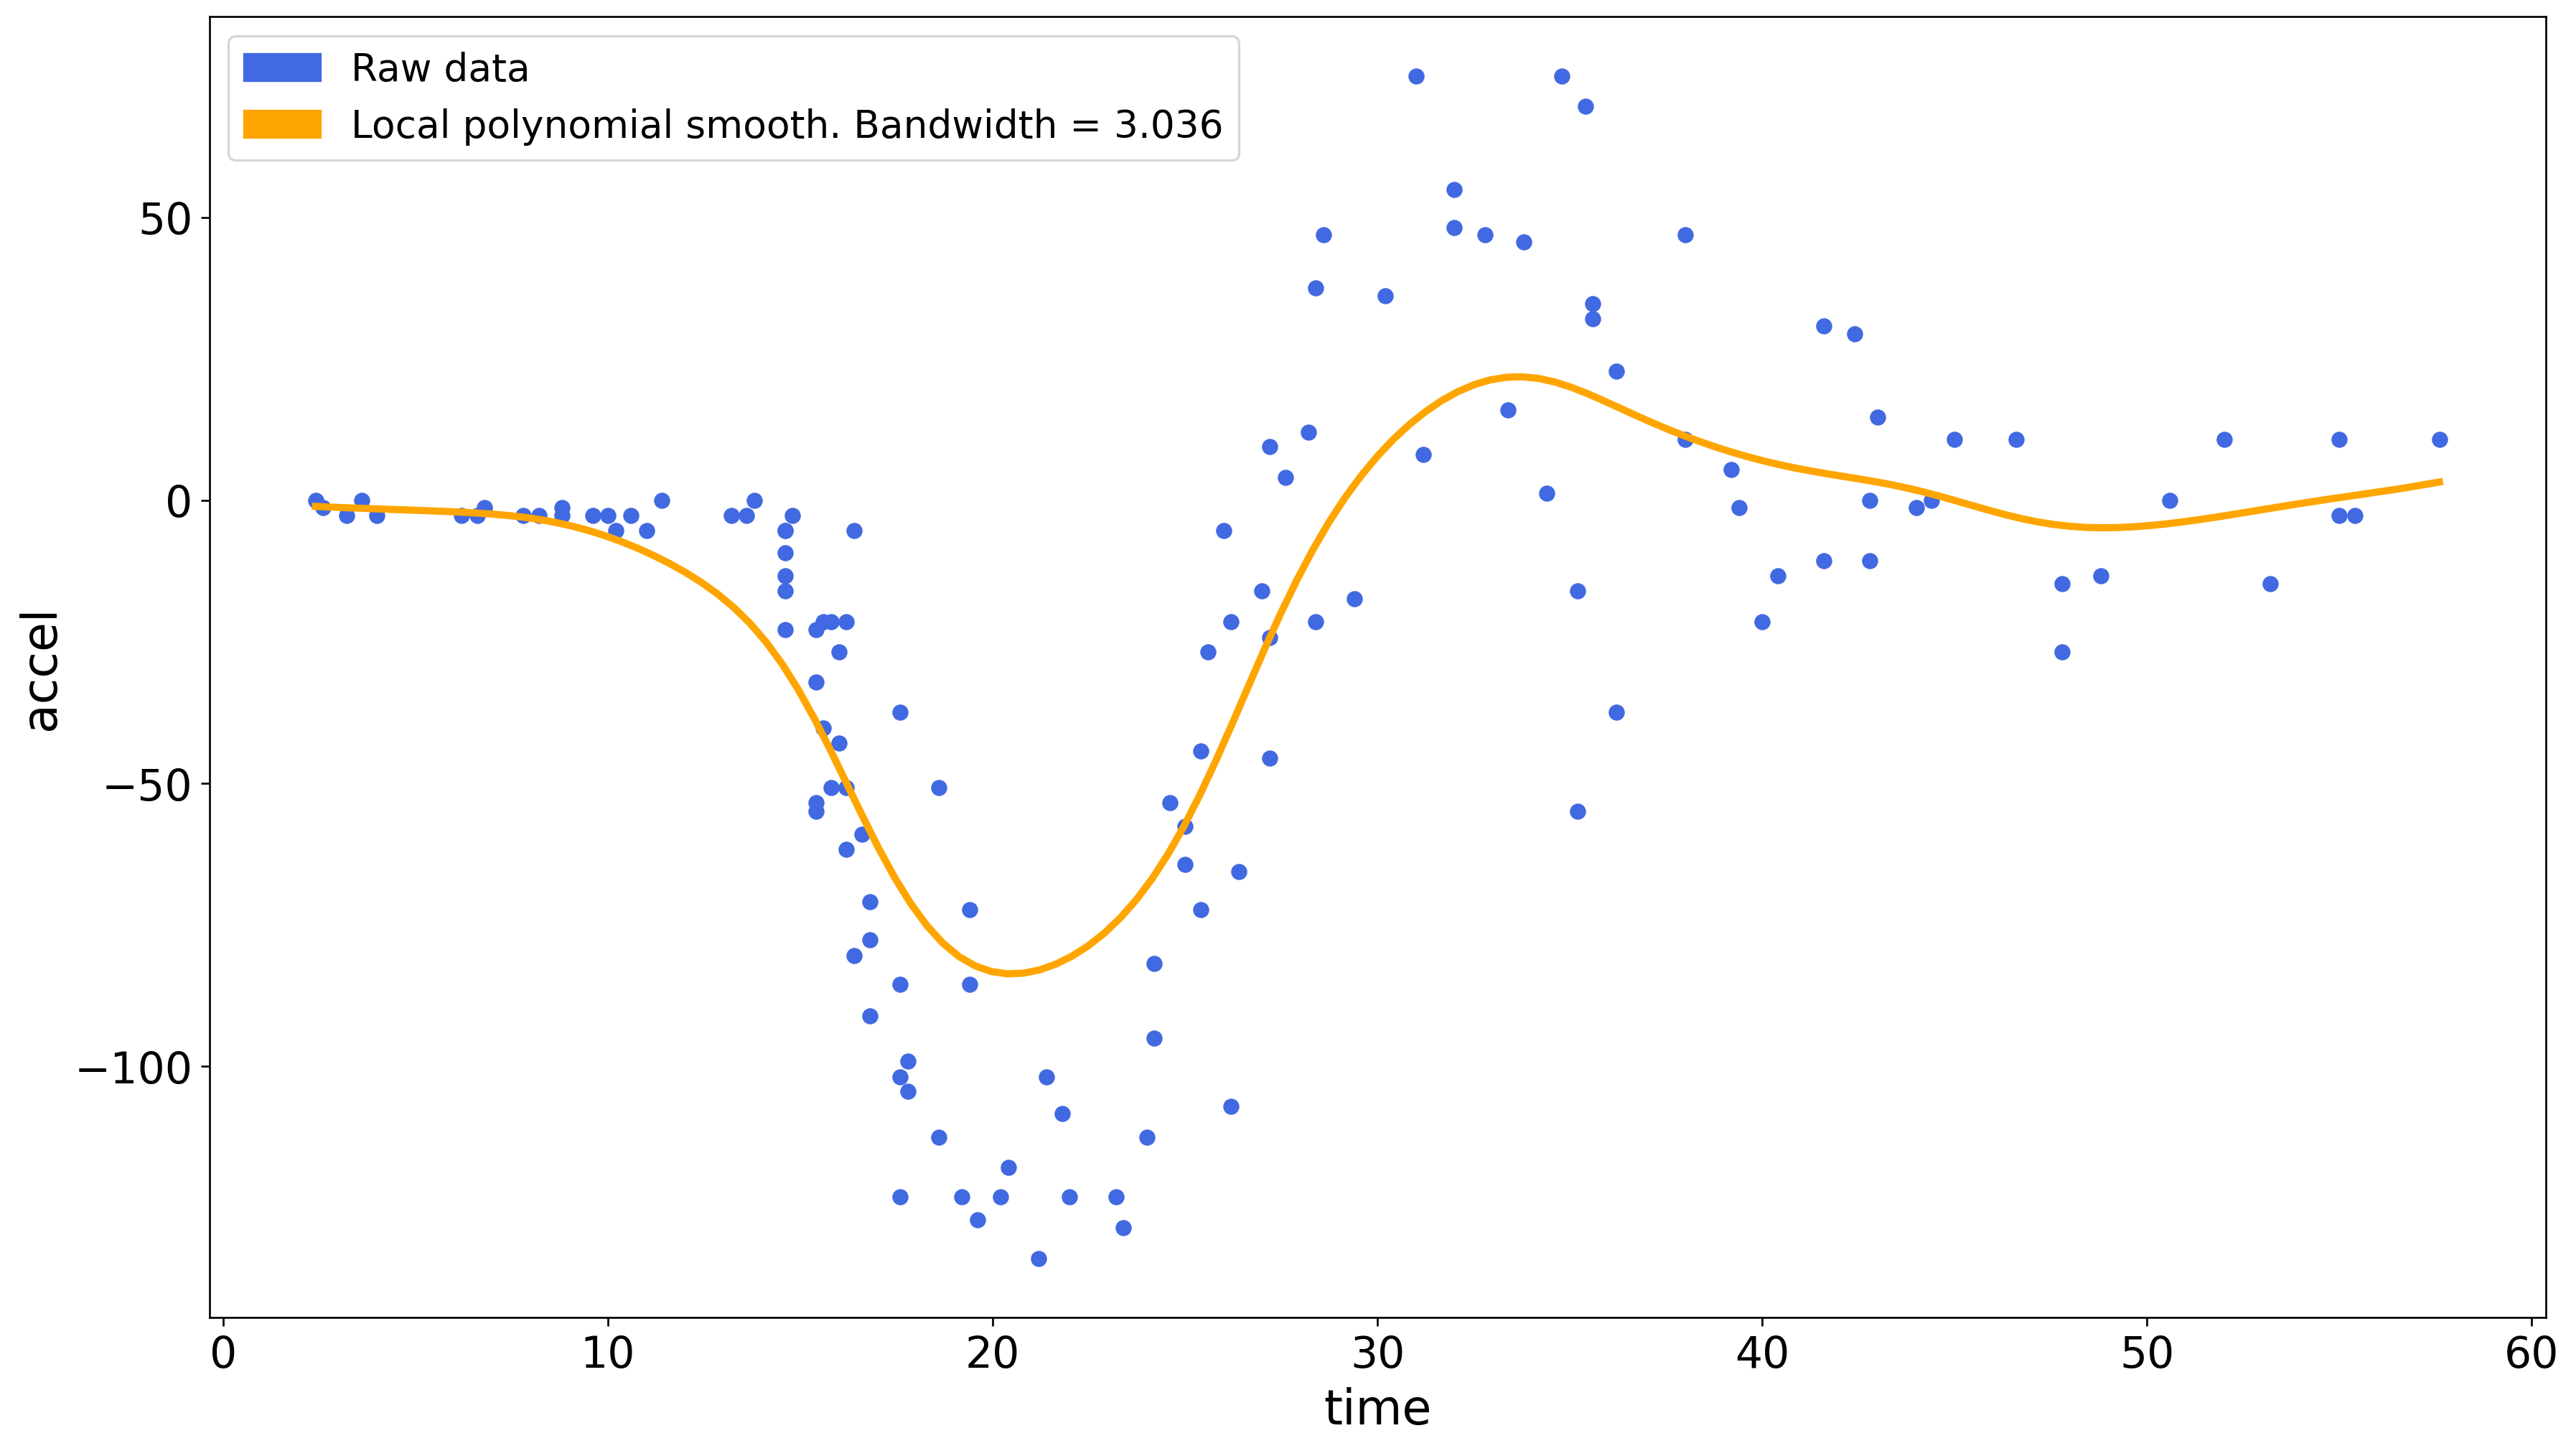

In [ ]:
import kernreg as kr

motorcycle = kr.get_example_data()
x1, y1 = motorcycle["time"], motorcycle["accel"]

# By default, only x and y need to be provided.
# Derivative = 0 is chosen by default
# and hence the polynomial degree = 0 + 1.
rslt_default = kr.locpoly(x1, y1)
kr.plot(x1, y1, rslt_default, "motorcycle_default_fit.png")

In [ ]:
rslt_default